# GRIP The Sparks Foundation Internship Program

# Data Science & Business Analytics Task

# Prediction using Decision Tree Algorithm

# Name:- Kunal Arun Junghare

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Relationship between colums

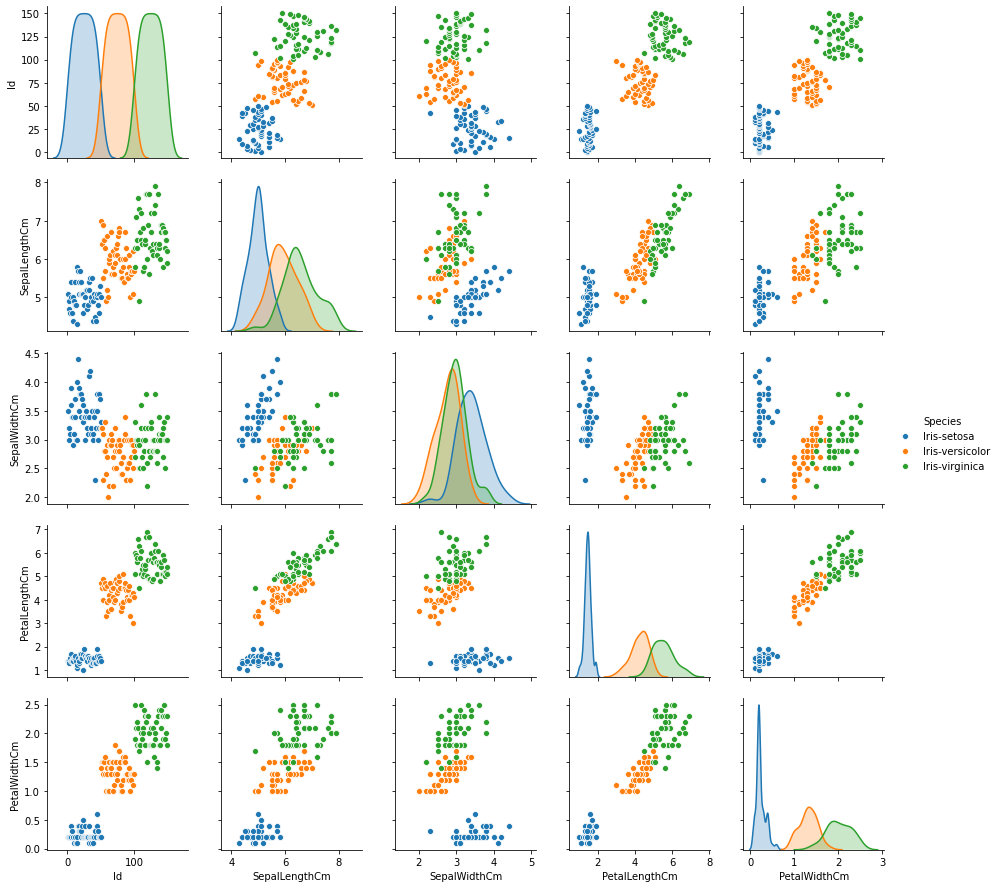

In [5]:
sns.pairplot(df, hue='Species')

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# X-Y Split

In [7]:
X = df.drop(["Id","Species"],axis=1)

In [8]:
X

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [9]:
Y= df['Species']

In [10]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
type(Y)

pandas.core.series.Series

# Test-Train Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [14]:
X_train.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
137            6.4           3.1            5.5           1.8
84             5.4           3.0            4.5           1.5
27             5.2           3.5            1.5           0.2
127            6.1           3.0            4.9           1.8
132            6.4           2.8            5.6           2.2

In [15]:
X_test.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
114            5.8           2.8            5.1           2.4
62             6.0           2.2            4.0           1.0
33             5.5           4.2            1.4           0.2
107            7.3           2.9            6.3           1.8
7              5.0           3.4            1.5           0.2

In [16]:
X_train.shape

(120, 4)

In [17]:
X_test.shape

(30, 4)

# Training Classification Tree

In [18]:
from sklearn import tree
clf= tree.DecisionTreeClassifier(max_depth = 4)

In [19]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Predict values using trained model

In [20]:
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

In [21]:
Y_test_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

# Model Performance

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
confusion_matrix(Y_train,Y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  1, 43]], dtype=int64)

In [24]:
confusion_matrix(Y_test,Y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [25]:
accuracy_score(Y_test,Y_test_pred)

1.0

# Plotting Decision Tree

In [26]:

dot_data = tree.export_graphviz(clf,out_file = None,feature_names=X_train.columns,filled= True,rounded=True,
                special_characters=True)

In [27]:
from IPython.display import Image

In [28]:
import pydotplus

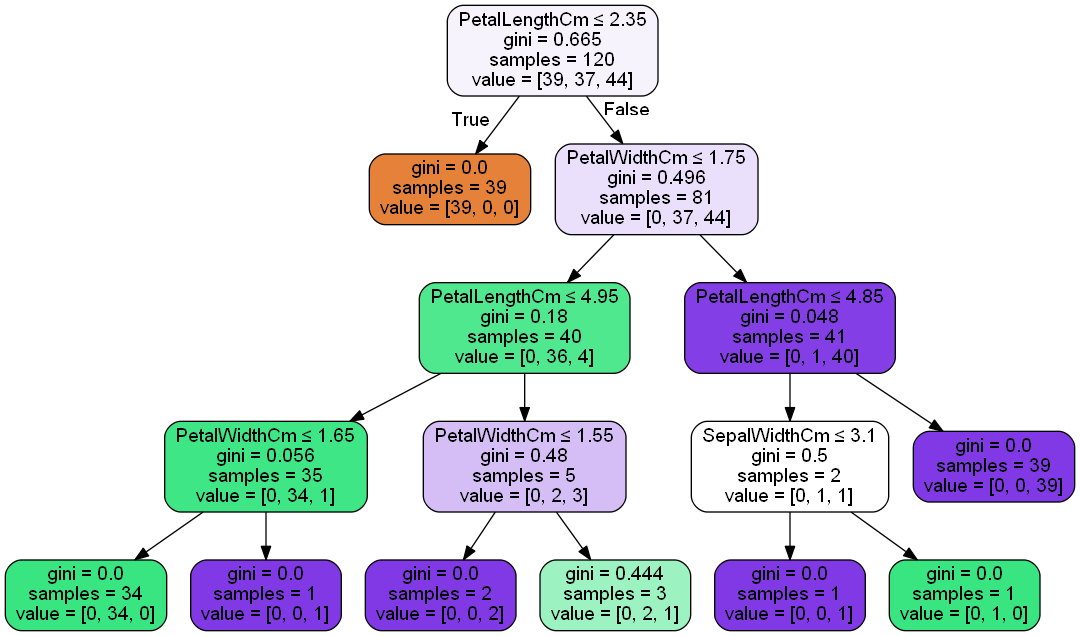

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())